## Border and Obstacles

In [1]:
from optiwindnet.api import WindFarmNetwork
import numpy as np
import matplotlib.pyplot as plt

load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\zlib1.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\abseil_dll.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\utf8_validity.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\re2.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\libprotobuf.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\highs.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\ortools.dll...


### Create a sample network

In [2]:
# all coordinates are sequences of (x, y) pairs
# if input coordinates are in arrays X and Y, use `np.hstack((X, Y))`
border = np.array( # coordinate sequence defines the polygon, last-first segment implicit
    [[1951, 200], [1951, 1383], [386, 1383], [650, 708], [624, 678],
     [4, 1036], [4, 3], [1152, 3], [917, 819], [957, 854]],
    dtype=float)

obstacles = [
    # - obstacles must be strictly inside the border polygon
    # - undefined behavior if obstacles and border overlap
    # first obstacle
    np.array([[1540, 920], [1600, 940], [1600, 1150], [1400, 1200]]),
    # [second obstacle] ...
]

substations = np.array([[696, 1063],], dtype=float)
turbines = np.array(
    [[1940, 279], [1920, 703], [1475, 696], [1839, 1250],
     [1277, 1296], [442, 1359], [737, 435], [1060, 26],
     [522, 176], [87, 35], [184, 417], [71, 878]],
    dtype=float
)

Initialize wfn with the given borders and obstacles

<Axes: >

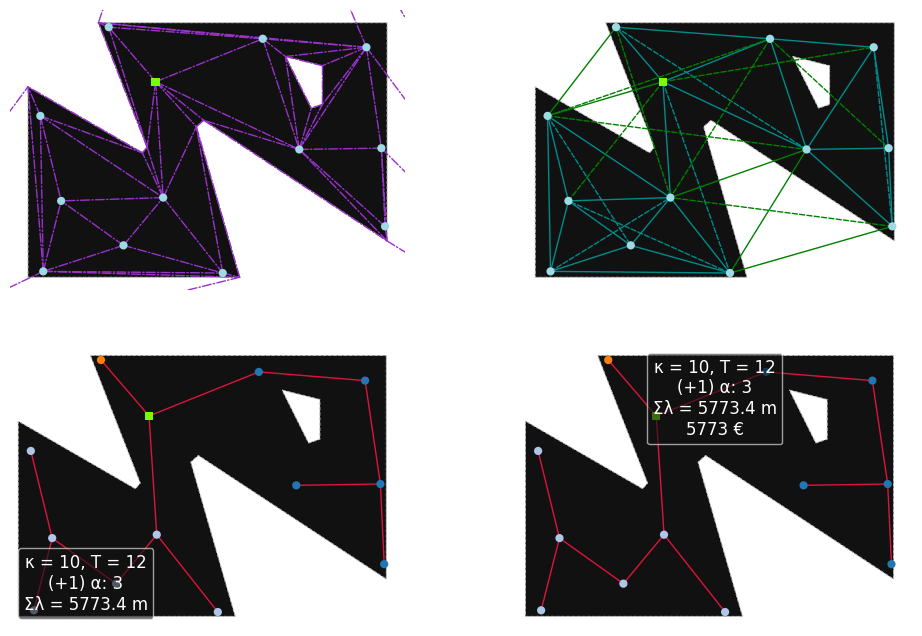

In [3]:
wfn_border_obstacles = WindFarmNetwork(turbines=turbines, substations=substations, border=border, obstacles=obstacles)
res_optimize = wfn_border_obstacles.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_border_obstacles.plot_navigation_mesh(ax=ax1)
wfn_border_obstacles.plot_available_links(ax=ax2)
wfn_border_obstacles.plot_selected_links(ax=ax3)
wfn_border_obstacles.plot(ax=ax4)

Only borders


<Axes: >

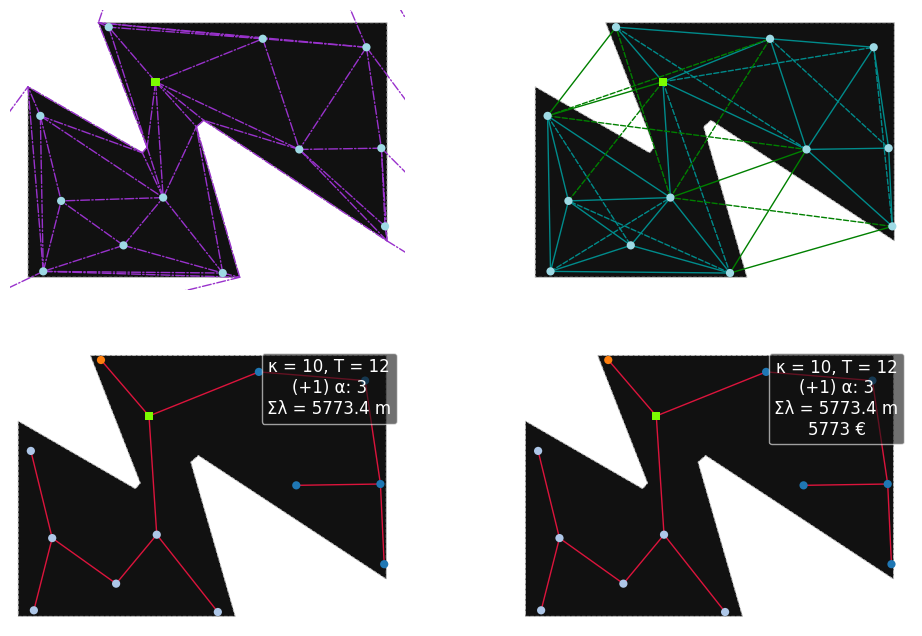

In [4]:
wfn_border = WindFarmNetwork(turbines=turbines, substations=substations, border=border)
res_optimize = wfn_border.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_border.plot_navigation_mesh(ax=ax1)
wfn_border.plot_available_links(ax=ax2)
wfn_border.plot_selected_links(ax=ax3)
wfn_border.plot(ax=ax4)

Only obstacles

<Axes: >

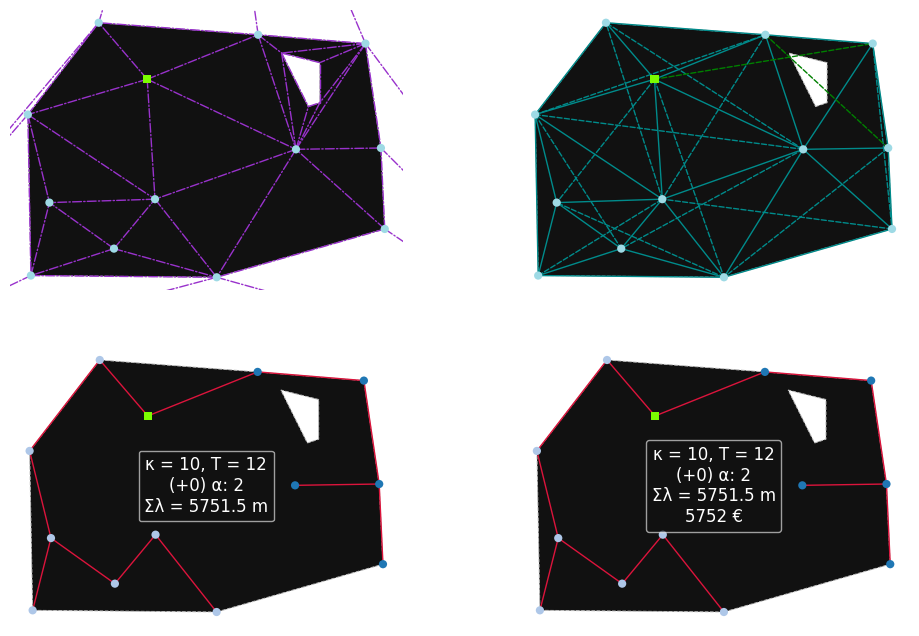

In [5]:
wfn_obstacles = WindFarmNetwork(turbines=turbines, substations=substations, obstacles=obstacles)
res_optimize = wfn_obstacles.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_obstacles.plot_navigation_mesh(ax=ax1)
wfn_obstacles.plot_available_links(ax=ax2)
wfn_obstacles.plot_selected_links(ax=ax3)
wfn_obstacles.plot(ax=ax4)

No borders, no obstacles

<Axes: >

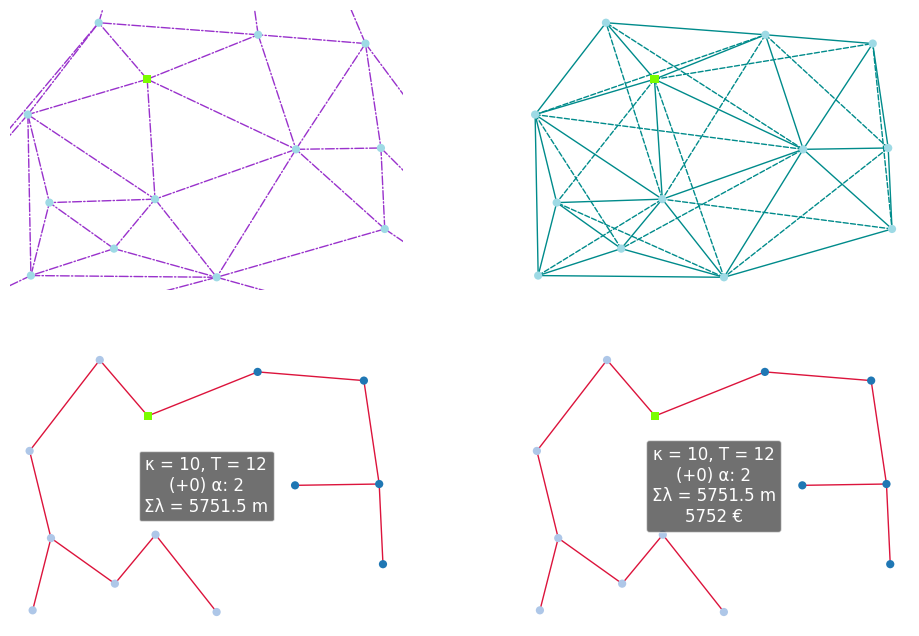

In [6]:
wfn = WindFarmNetwork(turbines=turbines, substations=substations)
res_optimize = wfn.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn.plot_navigation_mesh(ax=ax1)
wfn.plot_available_links(ax=ax2)
wfn.plot_selected_links(ax=ax3)
wfn.plot(ax=ax4)

New obstacles

In [7]:
obstacles = [
    np.array([[1540, 920], [1600, 940], [1600, 1150], [900, 1900]]),
    np.array([[-100, 100], [400, 100], [400, 400], [100, 400]]),
]

<Axes: >

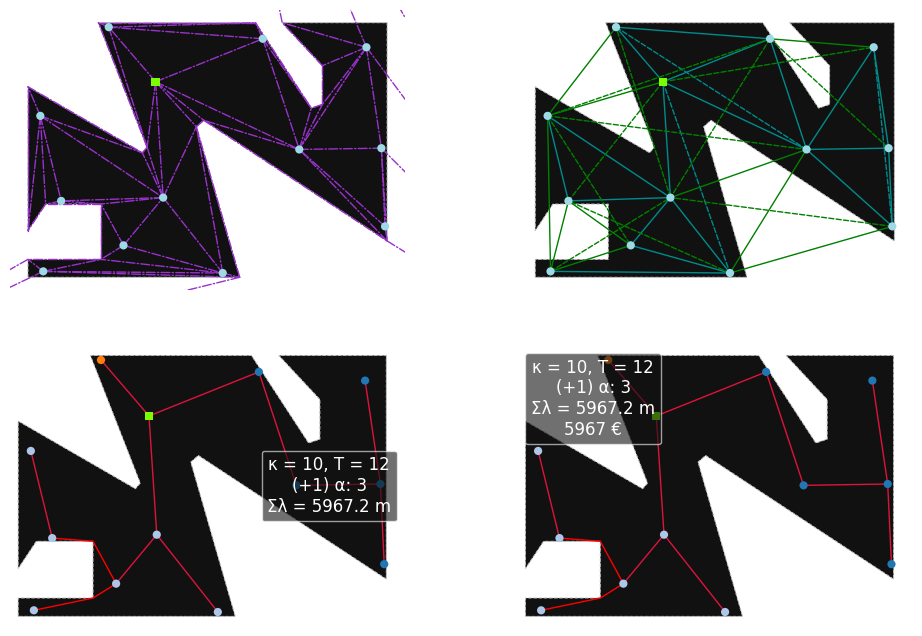

In [8]:
# border + obstacles
wfn_new_border_obstacles = WindFarmNetwork(turbines=turbines, substations=substations, border=border, obstacles=obstacles)
res_optimize = wfn_new_border_obstacles.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_new_border_obstacles.plot_navigation_mesh(ax=ax1)
wfn_new_border_obstacles.plot_available_links(ax=ax2)
wfn_new_border_obstacles.plot_selected_links(ax=ax3)
wfn_new_border_obstacles.plot(ax=ax4)

<Axes: >

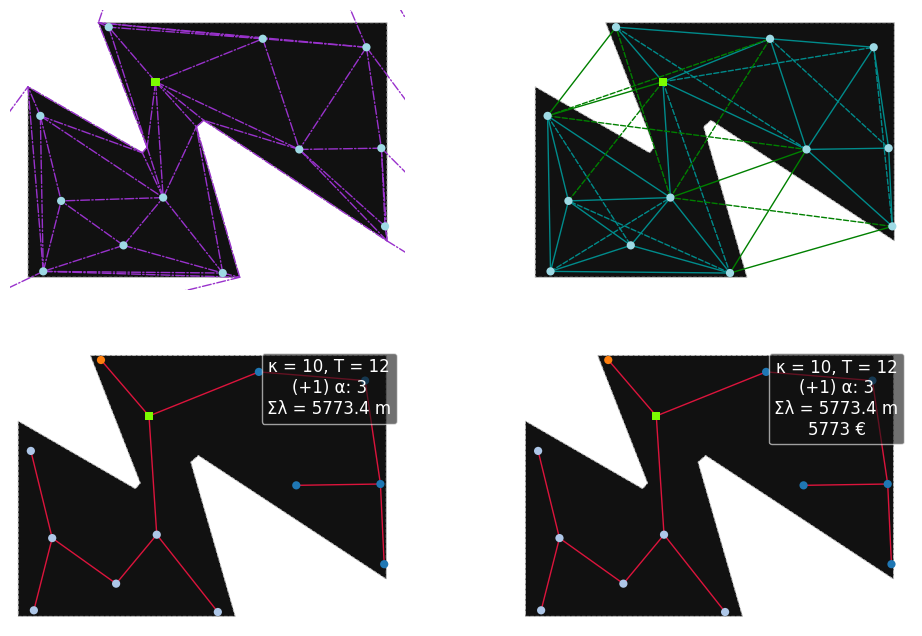

In [9]:
# only borders
wfn_new_border = WindFarmNetwork(turbines=turbines, substations=substations, border=border)
res_optimize = wfn_new_border.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_new_border.plot_navigation_mesh(ax=ax1)
wfn_new_border.plot_available_links(ax=ax2)
wfn_new_border.plot_selected_links(ax=ax3)
wfn_new_border.plot(ax=ax4)

C:\code\OptiWindNet\optiwindnet\mesh.py:447: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(np.dot(-XY, YZ)/_XY_/_YZ_)


<Axes: >

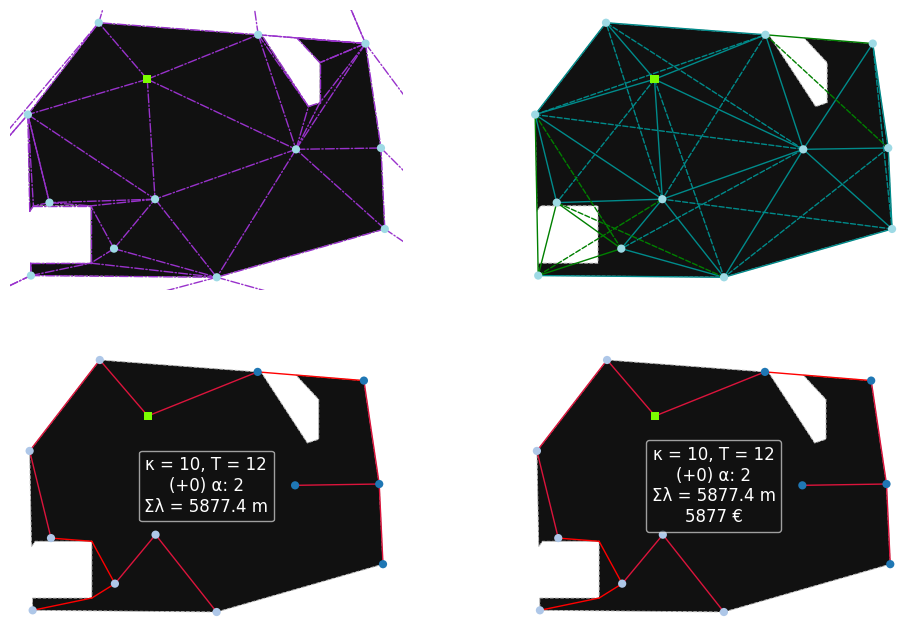

In [10]:
# only obstacles
wfn_new_obstacles = WindFarmNetwork(turbines=turbines, substations=substations, obstacles=obstacles)
res_optimize = wfn_new_obstacles.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_new_obstacles.plot_navigation_mesh(ax=ax1)
wfn_new_obstacles.plot_available_links(ax=ax2)
wfn_new_obstacles.plot_selected_links(ax=ax3)
wfn_new_obstacles.plot(ax=ax4)

<Axes: >

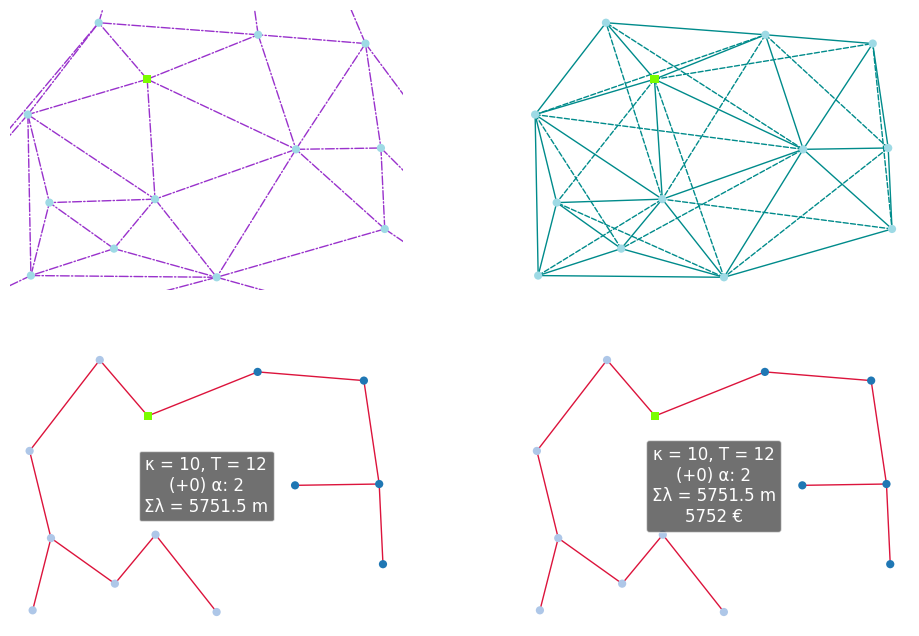

In [11]:
# No border, no obstacles
wfn_new = WindFarmNetwork(turbines=turbines, substations=substations)
res_optimize = wfn_new.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_new.plot_navigation_mesh(ax=ax1)
wfn_new.plot_available_links(ax=ax2)
wfn_new.plot_selected_links(ax=ax3)
wfn_new.plot(ax=ax4)